### Loading the dataset

In [1]:
# importing libraries
import datetime
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import multilabel_confusion_matrix

In [2]:
# loading the dataset
df = pd.read_csv("~/Desktop/roo_data.csv")

In [3]:
# visualizing the dataset
df.head()

Acedamic percentage in Operating Systems  percentage in Algorithms  \
0                                        69                        63   
1                                        78                        62   
2                                        71                        86   
3                                        76                        87   
4                                        92                        62   

   Percentage in Programming Concepts  Percentage in Software Engineering  \
0                                  78                                  87   
1                                  73                                  60   
2                                  91                                  87   
3                                  60                                  84   
4                                  90                                  67   

   Percentage in Computer Networks  Percentage in Electronics Subjects  \
0                               94                                  94   
1                               71                                  70   
2                               61                                  81   
3                               89                                  73   
4                               71                                  89   

   Percentage in Computer Architecture  Percentage in Mathematics  \
0                                   87                         84   
1                                   73                         84   
2                                   72                         72   
3                                   62                         88   
4                                   73                         71   

   Percentage in Communication skills  Hours working per day  ...  \
0                                  61                      9  ...   
1                                  91                     12  ...   
2                                  94                     11  ...   
3                                  69                      7  ...   
4                                  73                      4  ...   

   Interested Type of Books  Salary Range Expected  In a Realtionship?  \
0              Prayer books                 salary                  no   
1                 Childrens                 salary                 yes   
2                    Travel                   Work                  no   
3                   Romance                   Work                 yes   
4                 Cookbooks                 salary                  no   

   Gentle or Tuff behaviour? Management or Technical Salary/work  \
0                   stubborn              Management      salary   
1                     gentle               Technical      salary   
2                   stubborn              Management        work   
3                     gentle              Management        work   
4                   stubborn              Management        work   

  hard/smart worker worked in teams ever? Introvert  \
0       hard worker                   yes        no   
1       hard worker                    no       yes   
2       hard worker                    no       yes   
3      smart worker                   yes       yes   
4       hard worker                   yes       yes   

               Suggested Job Role  
0              Database Developer  
1            Portal Administrator  
2            Portal Administrator  
3  Systems Security Administrator  
4        Business Systems Analyst  

[5 rows x 39 columns]

In [4]:
# checking shape of data
df.shape

(20000, 39)

### Basic Pre processing of the data

In [5]:
# checking for null values
df.isnull().sum()
# no null values exist

Acedamic percentage in Operating Systems    0
percentage in Algorithms                    0
Percentage in Programming Concepts          0
Percentage in Software Engineering          0
Percentage in Computer Networks             0
Percentage in Electronics Subjects          0
Percentage in Computer Architecture         0
Percentage in Mathematics                   0
Percentage in Communication skills          0
Hours working per day                       0
Logical quotient rating                     0
hackathons                                  0
coding skills rating                        0
public speaking points                      0
can work long time before system?           0
self-learning capability?                   0
Extra-courses did                           0
certifications                              0
workshops                                   0
talenttests taken?                          0
olympiads                                   0
reading and writing skills        

In [6]:
# checking datatype of columns
df.info()
# some datatypes are object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  int64 
 1   percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical quotient rating                   2000

In [7]:
# unique job roles
df['Suggested Job Role'].unique()

array(['Database Developer', 'Portal Administrator',
       'Systems Security Administrator', 'Business Systems Analyst',
       'Software Systems Engineer', 'Business Intelligence Analyst',
       'CRM Technical Developer', 'Mobile Applications Developer',
       'UX Designer', 'Quality Assurance Associate', 'Web Developer',
       'Information Security Analyst', 'CRM Business Analyst',
       'Technical Support', 'Project Manager',
       'Information Technology Manager', 'Programmer Analyst',
       'Design & UX', 'Solutions Architect', 'Systems Analyst',
       'Network Security Administrator', 'Data Architect',
       'Software Developer', 'E-Commerce Analyst',
       'Technical Services/Help Desk/Tech Support',
       'Information Technology Auditor', 'Database Manager',
       'Applications Developer', 'Database Administrator',
       'Network Engineer', 'Software Engineer', 'Technical Engineer',
       'Network Security Engineer',
       'Software Quality Assurance (QA) / Testi

In [8]:
# combining/generalising job roles into 5 basic categoes: Developer, Engineer, Analyst, Manager, Support
for i in df.index:
    if df.at[i,'Suggested Job Role'] == 'Database Developer' or df.at[i,'Suggested Job Role'] == 'CRM Technical Developer' or df.at[i,'Suggested Job Role'] == 'Mobile Applications Developer' or df.at[i,'Suggested Job Role'] == 'UX Designer' or df.at[i,'Suggested Job Role'] == 'Web Developer' or df.at[i,'Suggested Job Role'] == 'Applications Developer' or df.at[i,'Suggested Job Role'] == 'Software Developer' or df.at[i,'Suggested Job Role'] == 'Design & UX':
        df.at[i,'Suggested Job Role'] = 'Developer'
    elif df.at[i,'Suggested Job Role'] == 'Software Systems Engineer' or df.at[i,'Suggested Job Role'] == 'Software Engineer' or df.at[i,'Suggested Job Role'] == 'Technical Engineer' or df.at[i,'Suggested Job Role'] == 'Network Engineer' or df.at[i,'Suggested Job Role'] == 'Network Security Engineer':
        df.at[i,'Suggested Job Role'] = 'Engineer'
    elif df.at[i,'Suggested Job Role'] == 'Business Systems Analyst' or df.at[i,'Suggested Job Role'] == 'Business Intelligence Analyst' or df.at[i,'Suggested Job Role'] == 'Information Security Analyst' or df.at[i,'Suggested Job Role'] == 'CRM Business Analyst' or df.at[i,'Suggested Job Role'] == 'Programmer Analyst' or df.at[i,'Suggested Job Role'] == 'Systems Analyst' or df.at[i, 'Suggested Job Role'] == 'E-Commerce Analyst':
        df.at[i,'Suggested Job Role'] = 'Analyst'
    elif df.at[i,'Suggested Job Role'] == 'Project Manager' or df.at[i,'Suggested Job Role'] == 'Information Technology Manager' or df.at[i,'Suggested Job Role'] == 'Database Manager' or df.at[i,'Suggested Job Role'] == 'Information Technology Auditor' or df.at[i,'Suggested Job Role'] == 'Portal Administrator' or df.at[i,'Suggested Job Role'] == 'Systems Security Administrator' or df.at[i,'Suggested Job Role'] == 'Network Security Administrator' or df.at[i,'Suggested Job Role'] == 'Database Administrator':
        df.at[i,'Suggested Job Role'] = 'Manager'
    elif df.at[i,'Suggested Job Role'] == 'Quality Assurance Associate' or df.at[i,'Suggested Job Role'] == 'Technical Support' or df.at[i,'Suggested Job Role'] == 'Solutions Architect' or df.at[i,'Suggested Job Role'] == 'Data Architect' or df.at[i,'Suggested Job Role'] == 'Technical Services/Help Desk/Tech Support' or df.at[i,'Suggested Job Role'] == 'Software Quality Assurance (QA) / Testing':
        df.at[i,'Suggested Job Role'] = 'Support'
        

In [9]:
# now we have only 5 types of job roles
df['Suggested Job Role'].unique()

array(['Developer', 'Manager', 'Analyst', 'Engineer', 'Support'],
      dtype=object)

In [10]:
# dropping unnecesary columns which will not help in determining job roles
df = df.drop(["interested in games","Interested Type of Books","In a Realtionship?",
            "Gentle or Tuff behaviour?","can work long time before system?","talenttests taken?",
            "olympiads","reading and writing skills","Job/Higher Studies?","Introvert",
            "Taken inputs from seniors or elders",],axis = 1)

In [11]:
# converting categorical features to numeric except the target feature
df1 = df.iloc[:,0:36]
df1 = pd.get_dummies(df)
df1['Suggested Job Role'] = df['Suggested Job Role']

In [12]:
# label encoding the target feature
l = LabelEncoder()
df1['Suggested Job Role'] = l.fit_transform(df['Suggested Job Role'])

In [13]:
# visualizing pre-processed data
df1.head()

Acedamic percentage in Operating Systems  percentage in Algorithms  \
0                                        69                        63   
1                                        78                        62   
2                                        71                        86   
3                                        76                        87   
4                                        92                        62   

   Percentage in Programming Concepts  Percentage in Software Engineering  \
0                                  78                                  87   
1                                  73                                  60   
2                                  91                                  87   
3                                  60                                  84   
4                                  90                                  67   

   Percentage in Computer Networks  Percentage in Electronics Subjects  \
0                               94                                  94   
1                               71                                  70   
2                               61                                  81   
3                               89                                  73   
4                               71                                  89   

   Percentage in Computer Architecture  Percentage in Mathematics  \
0                                   87                         84   
1                                   73                         84   
2                                   72                         72   
3                                   62                         88   
4                                   73                         71   

   Percentage in Communication skills  Hours working per day  ...  \
0                                  61                      9  ...   
1                                  91                     12  ...   
2                                  94                     11  ...   
3                                  69                      7  ...   
4                                  73                      4  ...   

   hard/smart worker_hard worker  hard/smart worker_smart worker  \
0                              1                               0   
1                              1                               0   
2                              1                               0   
3                              0                               1   
4                              1                               0   

   worked in teams ever?_no  worked in teams ever?_yes  \
0                         0                          1   
1                         1                          0   
2                         1                          0   
3                         0                          1   
4                         0                          1   

   Suggested Job Role_Analyst  Suggested Job Role_Developer  \
0                           0                             1   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           1                             0   

   Suggested Job Role_Engineer  Suggested Job Role_Manager  \
0                            0                           0   
1                            0                           1   
2                            0                           1   
3                            0                           1   
4                            0                           0   

   Suggested Job Role_Support  Suggested Job Role  
0                           0                   1  
1                           0                   3  
2                           0                   3  
3                           0                   3  
4                           0                   0  

[5 

In [14]:
# separating out independant features and target variable
X = df1.iloc[:,:79]
y = df1.iloc[:,79]

In [15]:
# scalling the independant features
df_scaled = StandardScaler().fit_transform(X)

### Model building on 60-40 train test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

In [17]:
model1 = MLPClassifier(activation = 'logistic',solver = 'sgd',hidden_layer_sizes = (100,),random_state = 14)

In [18]:
# model fitting
model1.fit(X_train,y_train)

MLPClassifier(activation='logistic', random_state=14, solver='sgd')

In [19]:
# predicting X_test
y_pred = model1.predict(X_test)

In [20]:
# finding accuracy
acc1 = accuracy_score(y_test, y_pred)
print("Overall accuracy using 60-40 train test split: ", acc1)

Overall accuracy using 60-40 train test split:  0.61525


In [21]:
# getting confusin matrix
conMatrix1 = multilabel_confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(conMatrix1)

Confusion Matrix
[[[5664  769]
  [ 579  988]]

 [[3894 2264]
  [   0 1842]]

 [[6853    0]
  [1146    1]]

 [[5878   45]
  [  10 2067]]

 [[6633    0]
  [1343   24]]]


In [22]:
# calculating accuracy using confusion matrix by the formula:- 
# Accuracy ( number of correctly classified points / total number of points ) = (TP + TN)/(TP + TN + FP + FN)

print(f"Label 0 accuracy : {(conMatrix1[0][0][0]+conMatrix1[0][1][1])/(conMatrix1[0][0][0]+conMatrix1[0][0][1]+conMatrix1[0][1][0]+conMatrix1[0][1][1])}")
print(f"Label 1 accuracy : {(conMatrix1[1][0][0]+conMatrix1[1][1][1])/(conMatrix1[1][0][0]+conMatrix1[1][0][1]+conMatrix1[1][1][0]+conMatrix1[1][1][1])}")
print(f"Label 2 accuracy : {(conMatrix1[2][0][0]+conMatrix1[2][1][1])/(conMatrix1[2][0][0]+conMatrix1[2][0][1]+conMatrix1[2][1][0]+conMatrix1[2][1][1])}")
print(f"Label 3 accuracy : {(conMatrix1[3][0][0]+conMatrix1[3][1][1])/(conMatrix1[3][0][0]+conMatrix1[3][0][1]+conMatrix1[3][1][0]+conMatrix1[3][1][1])}")
print(f"Label 4 accuracy : {(conMatrix1[4][0][0]+conMatrix1[4][1][1])/(conMatrix1[4][0][0]+conMatrix1[4][0][1]+conMatrix1[4][1][0]+conMatrix1[4][1][1])}")


Label 0 accuracy : 0.8315
Label 1 accuracy : 0.717
Label 2 accuracy : 0.85675
Label 3 accuracy : 0.993125
Label 4 accuracy : 0.832125


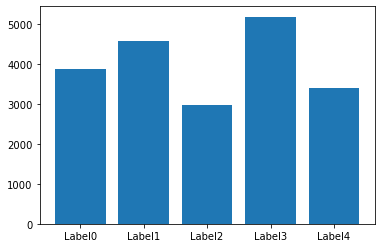

In [23]:
label_0 = np.sum(y == 0)
label_1 = np.sum(y == 1)
label_2 = np.sum(y == 2)
label_3 = np.sum(y == 3)
label_4 = np.sum(y == 4)

plt.bar(["Label0","Label1","Label2","Label3","Label4"],[label_0,label_1,label_2,label_3,label_4])
plt.show()

### Model building on 70-30 train test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 4)

In [25]:
# model fitting and predicting
model2 = MLPClassifier(activation = 'logistic',solver = 'sgd',hidden_layer_sizes = (100,),random_state = 10)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)

In [26]:
acc2 = accuracy_score(y_test, y_pred)
print("Overall accuracy using 70-30 train test split: ", acc2)

Overall accuracy using 70-30 train test split:  0.32466666666666666


In [27]:
conMatrix2 = multilabel_confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(conMatrix2)

Confusion Matrix
[[[4842    0]
  [1158    0]]

 [[4622    0]
  [ 970  408]]

 [[5121    0]
  [ 879    0]]

 [[ 408 4052]
  [   0 1540]]

 [[4955    0]
  [1045    0]]]


In [28]:
# calculating accuracy using confusion matrix by the formula:- 
# Accuracy ( number of correctly classified points / total number of points ) = (TP + TN)/(TP + TN + FP + FN)

print(f"Label 0 accuracy : {(conMatrix2[0][0][0]+conMatrix2[0][1][1])/(conMatrix2[0][0][0]+conMatrix2[0][0][1]+conMatrix2[0][1][0]+conMatrix2[0][1][1])}")
print(f"Label 1 accuracy : {(conMatrix2[1][0][0]+conMatrix2[1][1][1])/(conMatrix2[1][0][0]+conMatrix2[1][0][1]+conMatrix2[1][1][0]+conMatrix2[1][1][1])}")
print(f"Label 2 accuracy : {(conMatrix2[2][0][0]+conMatrix2[2][1][1])/(conMatrix2[2][0][0]+conMatrix2[2][0][1]+conMatrix2[2][1][0]+conMatrix2[2][1][1])}")
print(f"Label 3 accuracy : {(conMatrix2[3][0][0]+conMatrix2[3][1][1])/(conMatrix2[3][0][0]+conMatrix2[3][0][1]+conMatrix2[3][1][0]+conMatrix2[3][1][1])}")
print(f"Label 4 accuracy : {(conMatrix2[4][0][0]+conMatrix2[4][1][1])/(conMatrix2[4][0][0]+conMatrix2[4][0][1]+conMatrix2[4][1][0]+conMatrix2[4][1][1])}")


Label 0 accuracy : 0.807
Label 1 accuracy : 0.8383333333333334
Label 2 accuracy : 0.8535
Label 3 accuracy : 0.32466666666666666
Label 4 accuracy : 0.8258333333333333


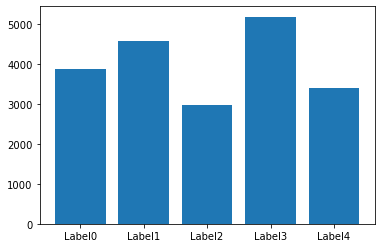

In [29]:
label_0 = np.sum(y == 0)
label_1 = np.sum(y == 1)
label_2 = np.sum(y == 2)
label_3 = np.sum(y == 3)
label_4 = np.sum(y == 4)
plt.bar(["Label0","Label1","Label2","Label3","Label4"],[label_0,label_1,label_2,label_3,label_4])
plt.show()

### Model building on 90-10 train test split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 24)

In [31]:
# model fitting and predicting
model3 = MLPClassifier(activation = 'logistic',solver = 'sgd',hidden_layer_sizes = (100,),random_state = 1)
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)

In [32]:
acc3 = accuracy_score(y_test, y_pred)
print("Overall accuracy using 90-10 train test split: ",acc3)

Overall accuracy using 90-10 train test split:  0.6178333333333333


In [33]:
conMatrix3 = multilabel_confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(conMatrix3)

Confusion Matrix
[[[4846   11]
  [ 367  776]]

 [[4590   16]
  [  11 1383]]

 [[5109    0]
  [ 891    0]]

 [[2186 2266]
  [   0 1548]]

 [[4976    0]
  [1024    0]]]


In [34]:
# calculating accuracy using confusion matrix by the formula:- 
# Accuracy ( number of correctly classified points / total number of points ) = (TP + TN)/(TP + TN + FP + FN)

print(f"Label 0 accuracy : {(conMatrix3[0][0][0]+conMatrix3[0][1][1])/(conMatrix3[0][0][0]+conMatrix3[0][0][1]+conMatrix3[0][1][0]+conMatrix3[0][1][1])}")
print(f"Label 1 accuracy : {(conMatrix3[1][0][0]+conMatrix3[1][1][1])/(conMatrix3[1][0][0]+conMatrix3[1][0][1]+conMatrix3[1][1][0]+conMatrix3[1][1][1])}")
print(f"Label 2 accuracy : {(conMatrix3[2][0][0]+conMatrix3[2][1][1])/(conMatrix3[2][0][0]+conMatrix3[2][0][1]+conMatrix3[2][1][0]+conMatrix3[2][1][1])}")
print(f"Label 3 accuracy : {(conMatrix3[3][0][0]+conMatrix3[3][1][1])/(conMatrix3[3][0][0]+conMatrix3[3][0][1]+conMatrix3[3][1][0]+conMatrix3[3][1][1])}")
print(f"Label 4 accuracy : {(conMatrix3[4][0][0]+conMatrix3[4][1][1])/(conMatrix3[4][0][0]+conMatrix3[4][0][1]+conMatrix3[4][1][0]+conMatrix3[4][1][1])}")


Label 0 accuracy : 0.937
Label 1 accuracy : 0.9955
Label 2 accuracy : 0.8515
Label 3 accuracy : 0.6223333333333333
Label 4 accuracy : 0.8293333333333334


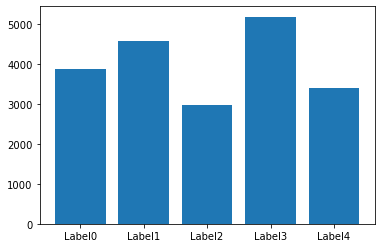

In [35]:
label_0 = np.sum(y == 0)
label_1 = np.sum(y == 1)
label_2 = np.sum(y == 2)
label_3 = np.sum(y == 3)
label_4 = np.sum(y == 4)
plt.bar(["Label0","Label1","Label2","Label3","Label4"],[label_0,label_1,label_2,label_3,label_4])
plt.show()